In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

In [3]:
kuni_users_profiles = pd.read_csv('user_profiles_kuni_07-11-2023.tsv', sep='\t')
kuni_users_profiles.columns = ['index', 'username', 'instance', 'displayname', 'twitterhandler', 'followers', 'following', 'created', 'bio']
kuni_users_profiles.head()

kuni_users_profiles['mastodon_name'] = kuni_users_profiles.apply(lambda row: "{}@{}".format(row['username'], row['instance']), axis=1)

datetime_str = '%Y-%m-%dT%H:%M:%S.000Z'

datetime_created = []
for str_date in kuni_users_profiles['created'].values:
    obj = datetime.datetime.strptime(str_date, datetime_str)
    datetime_created.append(obj)
kuni_users_profiles['created_datetime'] = datetime_created

print(kuni_users_profiles.head())

   index         username        instance      displayname  \
0      0  HelmutBuergmann   mstdn.science  Helmut Bürgmann   
1      1           boshek   fosstodon.org       Sam Albers   
2      2     DenisDuboule          mas.to    Denis Duboule   
3      3        paulgkeil  mastodon.world        PaulGKeil   
4      4        rider_jon         zirk.us       Jon Hughes   

                                      twitterhandler  followers  following  \
0                                                NaN         74         74   
1                                                NaN         59         45   
2                                                NaN        342         66   
3                                                NaN         12         10   
4  <span class="h-card"><a href="https://zirk.us/...        402        842   

                    created  \
0  2022-11-05T00:00:00.000Z   
1  2022-11-09T00:00:00.000Z   
2  2022-10-30T00:00:00.000Z   
3  2022-12-12T00:00:00.000Z   
4  

In [4]:
kuni_users_profiles.sort_values('followers', ascending=False).head(20)

,index,username,instance,displayname,twitterhandler,followers,following,created,bio,mastodon_name,created_datetime
803,803,pluralistic,mamot.fr,Cory Doctorow's linkblog,NaN,44105,758,2020-03-12T00:00:00.000Z,"<p>By Cory Doctorow<br /><span class=""h-card"">...",pluralistic@mamot.fr,2020-03-12
2705,2705,PeterGleick,fediscience.org,Peter Gleick,"<a href=""https://fedified.com/@petergleick"" ta...",12508,187,2022-11-05T00:00:00.000Z,<p>Climate and water scientist and communicato...,PeterGleick@fediscience.org,2022-11-05
1748,1748,cfiesler,hci.social,Dr. Casey Fiesler,NaN,10942,408,2022-10-28T00:00:00.000Z,<p>information science prof at university of c...,cfiesler@hci.social,2022-10-28
1825,1825,mer__edith,mastodon.world,Meredith Whittaker,NaN,10085,270,2022-11-26T00:00:00.000Z,"<p>President of <span class=""h-card"" translate...",mer__edith@mastodon.world,2022-11-26
2598,2598,maxroser,mas.to,Max Roser,NaN,8252,98,2022-12-11T00:00:00.000Z,<p>• Founder of OurWorldInData.org<br />• Rese...,maxroser@mas.to,2022-12-11
1758,1758,georgelakoff,sfba.social,George Lakoff,NaN,7920,176,2022-11-20T00:00:00.000Z,<p>Professor Emeritus at UC Berkeley. <br />B...,georgelakoff@sfba.social,2022-11-20
765,765,riedl,sigmoid.social,Mark Riedl,"<a href=""https://twitter.com/mark_riedl"" targe...",7761,433,2022-11-05T00:00:00.000Z,"<p>AI for storytelling, games, explainability,...",riedl@sigmoid.social,2022-11-05
702,702,rodhilton,mastodon.social,Rod Hilton,NaN,7389,633,2019-11-13T00:00:00.000Z,<p>backend services engineering • Twitter alum...,rodhilton@mastodon.social,2019-11-13
357,357,katestarbird,mstdn.social,Kate Starbird,NaN,6675,528,2022-11-04T00:00:00.000Z,<p>Associate Professor (HCDE) at the Universit...,katestarbird@mstdn.social,2022-11-04
503,503,elakdawalla,wandering.shop,Emily Lakdawalla,NaN,6430,400,2017-11-14T00:00:00.000Z,"<p>Planetary scientist, space boffin, captain ...",elakdawalla@wandering.shop,2017-11-14


/mnt/d/temporary/ipykernel_21829/1781589121.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('mastodon_accounts_created_at.png', tight_layout=True)


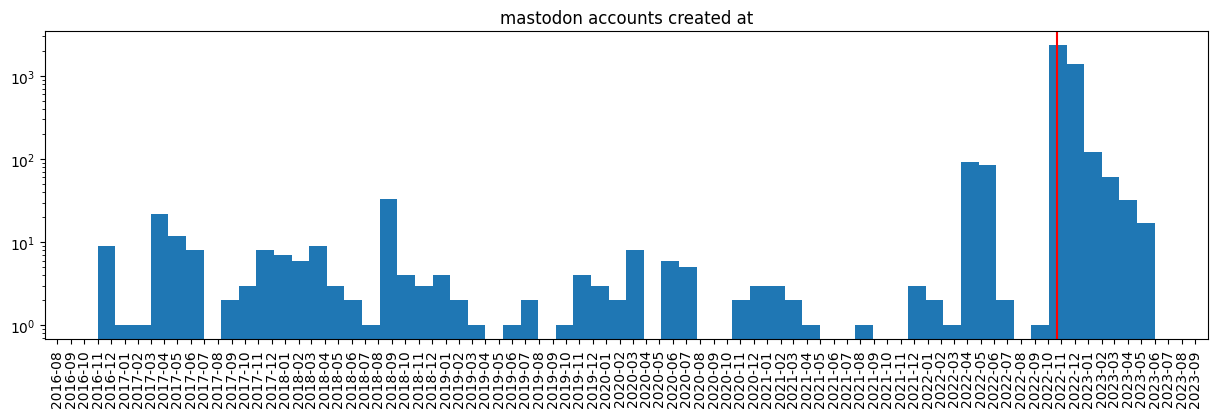

In [5]:
x = kuni_users_profiles['created_datetime']

plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist(x, bins=60)
plt.axvline(x=datetime.date(2022, 10, 22), color='red')

ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('mastodon accounts created at')
plt.savefig('mastodon_accounts_created_at.png', tight_layout=True)

In [6]:
toots = pd.read_csv('toots_kuni_list.tsv', sep='\t', dtype=object) ## 10/07/2023
print(len(toots))
toots = toots.dropna(subset='id')
print(len(toots))

toot_created = []
i = 0
datetime_str = ''
for str_date in toots['created_at'].values:
    obj = datetime.datetime.strptime(str_date[:-4], '%Y-%m-%dT%H:%M:%S.')
    toot_created.append(obj)
toots['created_datetime'] = toot_created
toots = toots.drop(columns = ['created_at', 'in_reply_to_account_id', 'Unnamed: 0'], axis=1)

155031
154949


In [7]:
toots.head()

,id,uri,replies_count,reblogs_count,favourites_count,content,mastodon_name,created_datetime
0,110547928364675842,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,2023-06-15 11:12:00
1,109865077222212213,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,2023-02-14 20:53:58
2,109865065540782373,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,2023-02-14 20:51:00
3,109822086288418991,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,2023-02-07 06:40:49
4,109806613521430505,https://mastodon.green/users/DrAnaQueiros/stat...,0.0,0.0,0.0,NaN,DrAnaQueiros@mastodon.green,2023-02-04 13:05:53


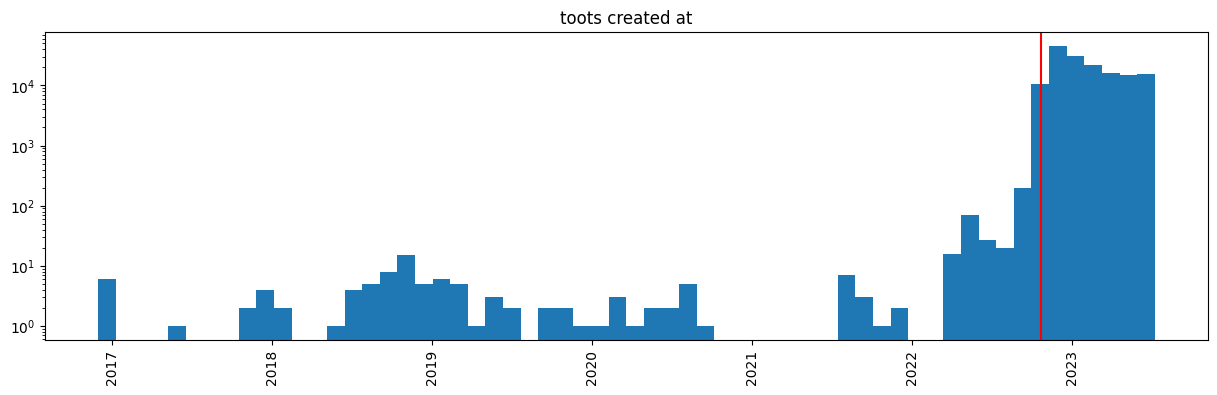

In [8]:
x = toots['created_datetime']

plt.figure(figsize=(15, 4))
unique, count = np.unique(x, return_counts=True)
plt.hist(x, bins=60)
plt.axvline(x=datetime.date(2022, 10, 22), color='red')

ax = plt.gca()
ax.xaxis_date()
# ax.xaxis.set_major_locator(MonthLocator())
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("toots created at")
plt.show()

In [9]:
## selecionar o subconjunto de autores que criaram a conta quando o elon musk anunciou a compra do twitter (efetivada)

## verificar as séries temporais de números de toots

kuni_users_profiles['profile_created_at'] = pd.to_datetime(kuni_users_profiles["created_datetime"]).dt.date
print(kuni_users_profiles.head())

after_elon = kuni_users_profiles[kuni_users_profiles['profile_created_at'] >= datetime.date(2022, 9, 1)]
print(len(after_elon))

   index         username        instance      displayname  \
0      0  HelmutBuergmann   mstdn.science  Helmut Bürgmann   
1      1           boshek   fosstodon.org       Sam Albers   
2      2     DenisDuboule          mas.to    Denis Duboule   
3      3        paulgkeil  mastodon.world        PaulGKeil   
4      4        rider_jon         zirk.us       Jon Hughes   

                                      twitterhandler  followers  following  \
0                                                NaN         74         74   
1                                                NaN         59         45   
2                                                NaN        342         66   
3                                                NaN         12         10   
4  <span class="h-card"><a href="https://zirk.us/...        402        842   

                    created  \
0  2022-11-05T00:00:00.000Z   
1  2022-11-09T00:00:00.000Z   
2  2022-10-30T00:00:00.000Z   
3  2022-12-12T00:00:00.000Z   
4  

In [10]:
len(kuni_users_profiles)

4309

In [11]:
after_elon.columns

Index(['index', 'username', 'instance', 'displayname', 'twitterhandler',
       'followers', 'following', 'created', 'bio', 'mastodon_name',
       'created_datetime', 'profile_created_at'],
      dtype='object')

In [12]:
after_elon = after_elon.merge(toots, on='mastodon_name')

In [13]:
after_elon.columns

Index(['index', 'username', 'instance', 'displayname', 'twitterhandler',
       'followers', 'following', 'created', 'bio', 'mastodon_name',
       'created_datetime_x', 'profile_created_at', 'id', 'uri',
       'replies_count', 'reblogs_count', 'favourites_count', 'content',
       'created_datetime_y'],
      dtype='object')

In [29]:
def frequency(toots):
    if len(toots) >= 5:
        diffs = []
        for idx,row in toots.iterrows():
            diff = row['created_datetime_y'].to_pydatetime().date() - row['profile_created_at']
            diffs.append(diff.days//7)    
        return diffs
    else:
        return []
    
after_elon_freq = after_elon.groupby('mastodon_name').apply(frequency)

In [30]:
after_elon_freq

mastodon_name
4heilig@mas.to                        [16, 10, 10, 9, 7, 6, 6, 6, 5, 3, 2, 2, 1]
AJBarth@fediscience.org        [34, 33, 33, 33, 32, 31, 31, 30, 30, 30, 30, 3...
ALuisaPinho@fediscience.org                         [28, 27, 19, 16, 1, 0, 0, 0]
AWarb@mastodon.world           [29, 28, 28, 28, 27, 27, 27, 25, 25, 25, 25, 2...
A_Ferry@mas.to                 [10, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,...
                                                     ...                        
yuhkitajima@mstdn.social                                                      []
zbjornson@mastodon.world                                                      []
zgtcooper@mastodon.social      [30, 30, 27, 25, 25, 24, 24, 24, 24, 24, 23, 1...
zizip@mastodon.social          [15, 14, 13, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, ...
zpneal@mastodon.social         [36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 3...
Length: 1182, dtype: object

In [34]:
len(after_elon_freq)

1182

In [31]:
X = []
Y = []
for row in after_elon_freq:
    unique, count = np.unique(row, return_counts=True)
    X.append(unique)
    Y.append(count)

X = np.concatenate(X)
Y = np.concatenate(Y)

In [32]:
len(X)

12629

429
38.0


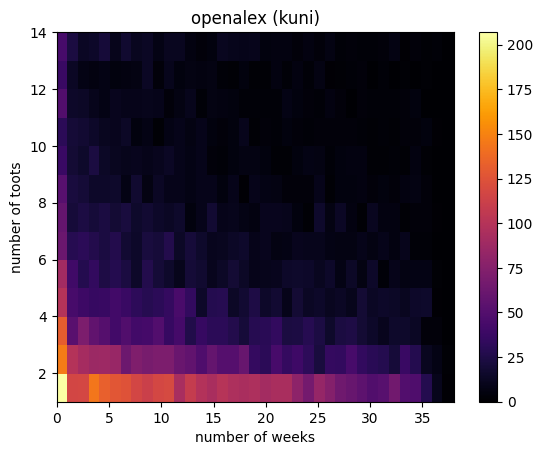

In [33]:
print(max(Y))
print(max(X))
xbins = np.linspace(min(X), max(X), 38)
ybins = np.linspace(min(Y), 14, 14)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(X, Y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('number of weeks')
ax.set_ylabel('number of toots')
plt.title('openalex (kuni)')
plt.colorbar(im[3], ax=ax)
plt.savefig('mastodon_toots_freq_kuni.png')

In [200]:
import glob

files = glob.glob('temp/users_toots_2023-05*') + glob.glob('temp/users_toots_2023-06-01*')
toots_git = []
for file in files: 
    toots_git.append(pd.read_csv(file, sep='\t'))
print(len(toots_git))
all_toots = pd.concat(toots_git)

97


In [201]:
len(all_toots)

1042585

1425
9


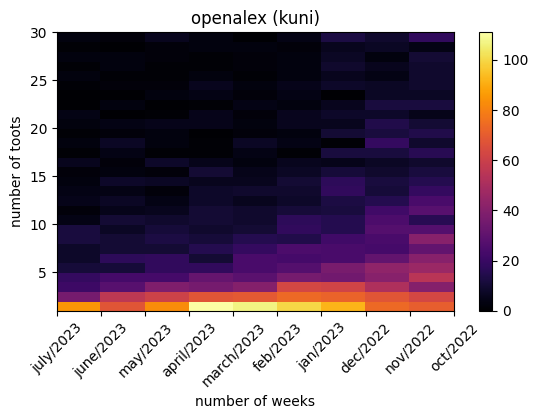

In [27]:
def frequency(toots):
    if len(toots) >= 5:
        diffs = []
        for idx,row in toots.iterrows():
            diff = datetime.date(2023, 7, 30) - row['created_datetime_y'].to_pydatetime().date()
            diffs.append(diff.days//30)    
        return diffs
    else:
        return []
    
after_elon_freq = after_elon.groupby('mastodon_name').apply(frequency)

X_weeks = 10
X = []
Y = []
to_plot = []
for row in after_elon_freq:
    unique, count = np.unique(row, return_counts=True)
    week_hist = []
    for week in range(X_weeks):
        temp = count[unique == week]
        if len(temp) == 0:
#             Y.append(0)
            pass
        else:
            Y.append(temp[0])
            X.append(week)
    
print(max(Y))
print(max(X))
xbins = np.linspace(min(X), 9, 10)
ybins = np.linspace(min(Y), 30, 30)

ax = plt.gca()
ax.set_facecolor("black")
im = ax.hist2d(X, Y, bins=(xbins, ybins), cmap='inferno') #vmin=1,vmax=10000))
ax.set_xlabel('number of weeks')
ax.set_ylabel('number of toots')
plt.xticks(xbins, ['july/2023', 'june/2023', 'may/2023', 'april/2023', 'march/2023', 'feb/2023', 'jan/2023', 'dec/2022', 'nov/2022', 'oct/2022'], rotation=45)
plt.title('openalex (kuni)')
plt.subplots_adjust(bottom=0.3)
plt.colorbar(im[3], ax=ax)
plt.savefig('mastodon_toots_freq_last_months_kuni.png')